# Logistic Regression
- Despite the name, Logistic Regression is not for regression — it’s actually a classification algorithm.
- It is used to predict categorical outcomes — typically binary (like 0 or 1, True or False, Yes or No).
- Formula

$$
\hat{y} = \frac{1}{1 + e^{-(mx + c)}}
$$

where

| Symbol         | Meaning                                 |
| :------------- | :-------------------------------------- |
| $$ x $$          | Input feature                           |
| $$ m $$          | Weight (slope)                          |
| $$ c $$          | Bias (intercept)                        |
| $$ z = mx + c$$  | Linear combination                      |
| $$ \hat{y} $$    | Predicted probability (between 0 and 1) |
| $$ \sigma(z) $$  | Sigmoid activation function             |


### Why did Classification Problems fail in Linear regression?
- Linear regression Works perfectly when  the output is continuous.
- Let’s say we want to classify students as:

| Hours | Passed (1) / Failed (0) |
| ----- | ----------------------- |
| 1     | 0                       |
| 2     | 0                       |
| 3     | 1                       |
| 4     | 1                       |

Now we want the model to predict either 0 or 1.

If we try to use Linear Regression `y = mx + c` It may give outputs like:


| Hours | Predicted (ŷ) |
| ----- | ------------- |
| 1     | -0.4          |
| 2     | 0.3           |
| 3     | 1.1           |
| 4     | 1.8           |

- Output is Unbounded
    - Linear regression can produce values < 0 or > 1,
    - Classification needs probabilities between 0 and 1.
    - So, we can’t interpret -0.4 or 1.8 as valid probabilities of "Pass".
- Linearity can’t model class boundaries well
    - Classification problems often have a non-linear boundary between classes.
    - Example:
        - Points of class 0 and class 1 might overlap.
        - A straight line can’t separate them properly.
    - Linear regression always tries to fit a straight line, which isn’t flexible enough for complex classification.
- Sensitive to outliers
    - In classification data (0 or 1), a single outlier (e.g., one mislabeled point) can shift the regression line dramatically, ruining the decision boundary.
- Assumption mismatch
    - Linear regression assumes:
        - Continuous dependent variable
        - Errors (residuals) are normally distributed
        - Constant variance
    - These assumptions break for classification, where:
        - Output is binary (0 or 1)
        - Residuals are not normally distributed


### Why we use Logistic regression

| Reason                            | Explanation                                                                                     |
| --------------------------------- | ----------------------------------------------------------------------------------------------- |
| ✅ **To classify outcomes**        | Predict whether something belongs to one of two categories (e.g., spam / not spam).             |
| ✅ **To get probabilities**        | Unlike hard classification, logistic regression gives probabilities (e.g., 80% chance of spam). |
| ✅ **Efficient and interpretable** | Easy to understand and compute (simple yet powerful).                                           |
| ✅ **Works with small datasets**   | Performs well even with limited data compared to deep models.                                   |


### How We Use Logistic Regression
The process is similar to linear regression — but instead of fitting a line, we fit a sigmoid curve to model probabilities.

Steps:
1. Collect and preprocess data
2. Split data into train/test sets
3. Train model → fit coefficients m, c
4. Predict probabilities
5. Convert probabilities to classes
6. Evaluate performance (accuracy, confusion matrix, etc.)

### Where We Use Logistic Regression
| Application            | Example                                       |
| ---------------------- | --------------------------------------------- |
| 🏦 **Finance**         | Predicting loan default (0 = no, 1 = yes)     |
| 💌 **Email**           | Spam vs Not Spam                              |
| 🧬 **Healthcare**      | Disease detection (0 = healthy, 1 = infected) |
| 👨‍💻 **HR Analytics** | Employee attrition (stay or leave)            |
| 🛍️ **E-commerce**     | Will customer buy product (yes/no)?           |


### Example
Let’s use a simple dataset — predicting whether a student passes or fails based on hours studied.

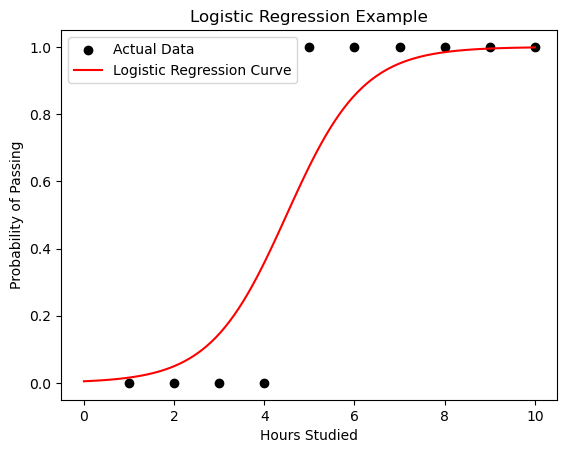

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Data: hours studied vs pass/fail
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Create and train model
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Plot results
plt.scatter(X, y, color='black', label='Actual Data')
plt.plot(X_test, y_prob, color='red', label='Logistic Regression Curve')
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression Example")
plt.legend()
plt.show()

#### Output Interpretation:
- The red sigmoid curve smoothly transitions from 0 → 1
- Around 5 hours, probability ≈ 0.5 → that’s the decision boundary
- Model says:
    - < 5 hours → likely fail
    - ≥ 5 hours → likely pass

#### Test Model

In [6]:
print(model.predict([[3]])) # fails

[0]


In [7]:
print(model.predict([[7]])) # pass

[1]


In [9]:
print(model.predict_proba([[7]])) # probability of passing is 0.95

[[0.04917374 0.95082626]]


In [10]:
print(model.predict([[5]])) # pass

[1]


In [11]:
print(model.predict_proba([[5]])) # probability of passing is 64%

[[0.35478473 0.64521527]]


# What is a Decision Boundary?
- A decision boundary is an imaginary line (or surface) that separates data points of different classes in a classification problem.
- In Logistic Regression, it’s the line where the model is 50% confident between class 0 and class 1.
- The decision boundary equation is

$$
mx+c=0
$$

and

$$
\frac{1}{1 + e^{-(mx + c)}} = 0.5
$$


Example: Imagine you’re predicting whether a student will pass (1) or fail (0) based on hours studied.
The model learns:

$$
Pass(pass) = \frac{1}{1 + e^{-(1.5x + 6)}}
$$

At $$ P = 0.5 $$

$$
1.5x + 6 = 0 => x = 4
$$

So:
- If a student studies < 4 hours → fail
- If a student studies ≥ 4 hours → pass

That threshold x = 4 is a decision boundary.

# Conclusion
- Logistic Regression is Linear Regression + Sigmoid Function that converts a linear score into a probability between 0 and 1 — perfect for classification tasks.